In [1]:
%reset -f

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
##read excel
import pandas as pd
data_path = "/content/drive/MyDrive/prediction-divij/data-divij.xlsx"
df= pd.read_excel(data_path, engine='openpyxl')

df

,Date,Inventory
0,2023-07-03,0.00
1,2023-07-04,-5.00
2,2023-07-05,-4.80
3,2023-07-06,0.00
4,2023-07-07,19.45
...,...,...
350,2024-11-07,-32.15
351,2024-11-08,-11.05
352,2024-11-11,31.00
353,2024-11-12,13.60


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       355 non-null    datetime64[ns]
 1   Inventory  355 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.7 KB


In [4]:
# add related columns

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Month'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Day_of_Year'] = df['Date'].dt.dayofyear
df['Inventory_is_Positive'] = df['Inventory'].apply(lambda x: 1 if x > 0 else 0)

df

,Date,Inventory,Year,Month,Day_of_Month,Day_of_Week,Day_of_Year,Inventory_is_Positive
0,2023-07-03,0.00,2023,7,3,0,184,0
1,2023-07-04,-5.00,2023,7,4,1,185,0
2,2023-07-05,-4.80,2023,7,5,2,186,0
3,2023-07-06,0.00,2023,7,6,3,187,0
4,2023-07-07,19.45,2023,7,7,4,188,1
...,...,...,...,...,...,...,...,...
350,2024-11-07,-32.15,2024,11,7,3,312,0
351,2024-11-08,-11.05,2024,11,8,4,313,0
352,2024-11-11,31.00,2024,11,11,0,316,1
353,2024-11-12,13.60,2024,11,12,1,317,1


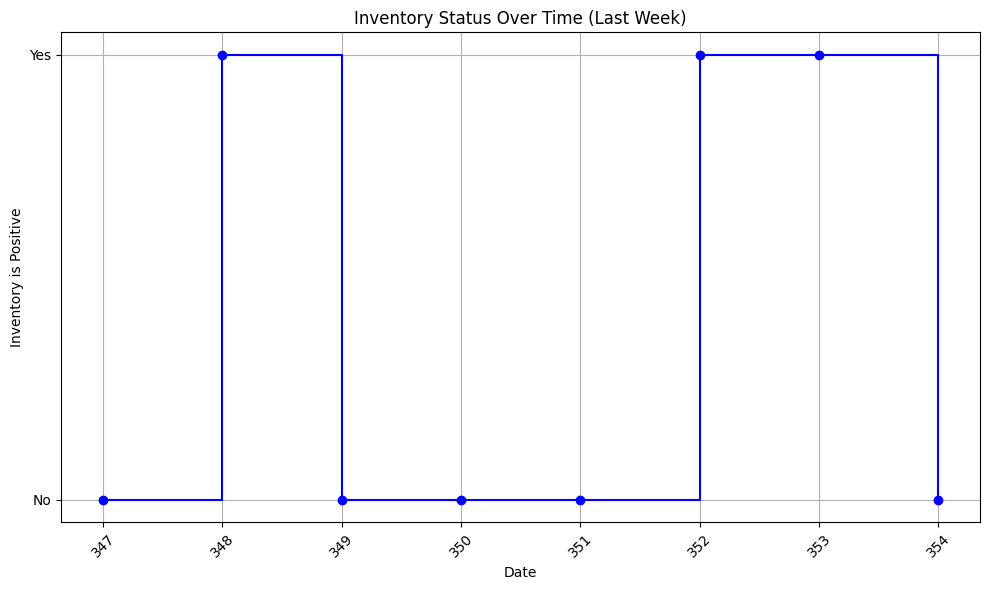

In [5]:
#plot data for last 10 days

import matplotlib.pyplot as plt

# Filter for the last week
plot_data = df[df['Date'] >= (df['Date'].max() - pd.Timedelta(days=10))]

# Plot
plt.figure(figsize=(10, 6))
plt.step(plot_data.index, plot_data['Inventory_is_Positive'], where='post', marker='o', linestyle='-', color='b')
plt.title('Inventory Status Over Time (Last Week)')
plt.xlabel('Date')
plt.ylabel('Inventory is Positive')
plt.yticks([0, 1], ['No', 'Yes'])
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
df.columns

Index(['Date', 'Inventory', 'Year', 'Month', 'Day_of_Month', 'Day_of_Week',
       'Day_of_Year', 'Inventory_is_Positive'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Drop the 'Date' column
df_preprocessed = df.drop(columns=['Date'])


# Separate features and target
X = df_preprocessed.drop(columns=['Inventory_is_Positive' , "Inventory"])
y = df_preprocessed['Inventory_is_Positive']

print("X shape:", X.shape)
print("y shape:", y.shape)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


X shape: (355, 5)
y shape: (355,)


In [13]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Build and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
y_test_binary = (y_test > 0).astype(int)
y_pred_binary = (y_pred > 0).astype(int)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
mse = mean_squared_error(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Mean Squared Error: {mse}')


Accuracy: 0.5633802816901409
Mean Squared Error: 0.43661971830985913


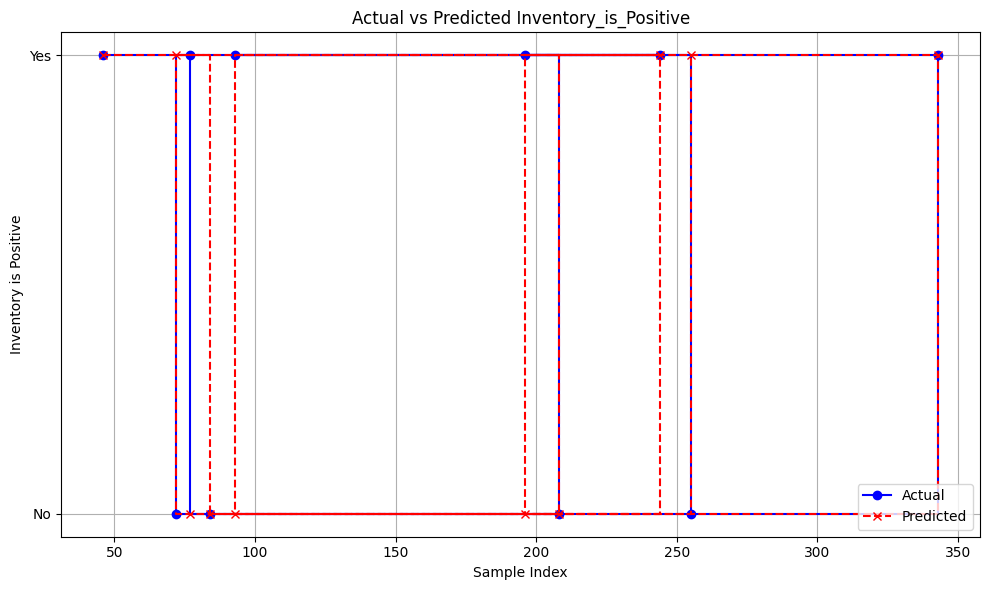

In [15]:
# Create a DataFrame for plotting

last_plot = 10
plot_data = pd.DataFrame({
    'Actual': y_test[-last_plot:],
    'Predicted': y_pred.flatten()[-last_plot:]
})

# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.step(plot_data.index, plot_data['Actual'], where='post', marker='o', linestyle='-', color='b', label='Actual')
plt.step(plot_data.index, plot_data['Predicted'], where='post', marker='x', linestyle='--', color='r', label='Predicted')
plt.title('Actual vs Predicted Inventory_is_Positive')
plt.xlabel('Sample Index')
plt.ylabel('Inventory is Positive')
plt.yticks([0, 1], ['No', 'Yes'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()